In [9]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from matplotlib.lines import Line2D

In [10]:
#Load Data
T_ON = pd.read_csv('result_tables/T_ON.csv')
T_OFFsus = pd.read_csv('result_tables/T_OFFsus.csv')
T_OFFtr = pd.read_csv('result_tables/T_OFFtr.csv')



In [11]:

def plot_points_mean(df, celltype, ylabel, title):

    pastel_palette = sns.color_palette("pastel")
    genotype_order = ['NF1(WT/WT)', 'NF1(NF1-KO/WT)', 'NF1_KO_labeled', 'NF1_KO_NOT_labeled']

    # Scatter plot for individual points
    plt.figure(figsize=(12, 6))

    sns.stripplot(x='genotype', y=ylabel, data=df, jitter=True, alpha=0.5, order=genotype_order)

   
    grouped_df = df.groupby('genotype')[ylabel].agg(['mean', 'sem']).reset_index()
    cellcount = df['genotype'].count()

    
    ax = sns.barplot(x='genotype', y='mean', data=grouped_df, errorbar=None, palette=pastel_palette, order=genotype_order)

    
    plt.xlabel('Genotype')
    plt.ylabel(title)
    plt.title('{} for Each Genotype {} N = {}'.format(title, celltype, cellcount))

  
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=pastel_palette[0], markersize=10, label='Individual Points'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor=pastel_palette[1], markersize=10, label='Bar Plot (Mean)'),
        Line2D([0], [0], marker='|', color='k', markerfacecolor='red', markersize=10, label='Error Bars (SEM)'), 
        Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=10, label='p < 0.05 t-test')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

    # Error bars
    for i, (bar, e) in enumerate(zip(ax.patches, grouped_df['sem'])):
        y = bar.get_height()  # Correct Y value
        ax.errorbar(
            bar.get_x() + bar.get_width() / 2,
            y,
            e,
            fmt='k.',
            capsize=5,
            capthick=1,
            elinewidth=1
        )
    
    # Perform t-tests and correct for multiple comparisons
    control_genotype = 'NF1(WT/WT)'
    mutant_genotypes = ['NF1(NF1-KO/WT)', 'NF1_KO_labeled', 'NF1_KO_NOT_labeled']
    
    
    alpha_corrected = 0.05 / len(mutant_genotypes)

    for mutant_genotype in mutant_genotypes:
        # Extract y values values for control and mutant genotypes
        control_values = df[df['genotype'] == control_genotype][ylabel]
        mutant_values = df[df['genotype'] == mutant_genotype][ylabel]
        
        # Perform t-test
        t_stat, p_value = ttest_ind(control_values, mutant_values)
        
        # Display results
        print(f"T-test between {control_genotype} and {mutant_genotype}:")
        print(f"T-statistic: {t_stat}")
        print(f"P-value: {p_value}")
        
        # Add stars for significant p-values
        if p_value < alpha_corrected:
            star_position = genotype_order.index(mutant_genotype)
            star_height = grouped_df[grouped_df['genotype'] == mutant_genotype]['mean'].values[0] + e + 2
            plt.text(star_position, star_height, "*", ha='center', va='bottom', color='red', fontsize=14)

        print("\n")

    plt.show()



In [12]:
# Function to plot the 3 alphas per condition
def show_plots (title, ylabel,  ylabelON):
    
    plot_points_mean(T_ON, 'ON alpha', ylabelON, title)
    plot_points_mean(T_OFFsus, 'OFF sustained alpha', ylabel, title)
    plot_points_mean(T_OFFtr, 'OFF transient alpha', ylabel, title)

T-test between NF1(WT/WT) and NF1(NF1-KO/WT):
T-statistic: -0.9951707175537361
P-value: 0.32251137899875393


T-test between NF1(WT/WT) and NF1_KO_labeled:
T-statistic: -2.656770550408341
P-value: 0.010561333398888892


T-test between NF1(WT/WT) and NF1_KO_NOT_labeled:
T-statistic: -3.505581840406278
P-value: 0.001079004741518981




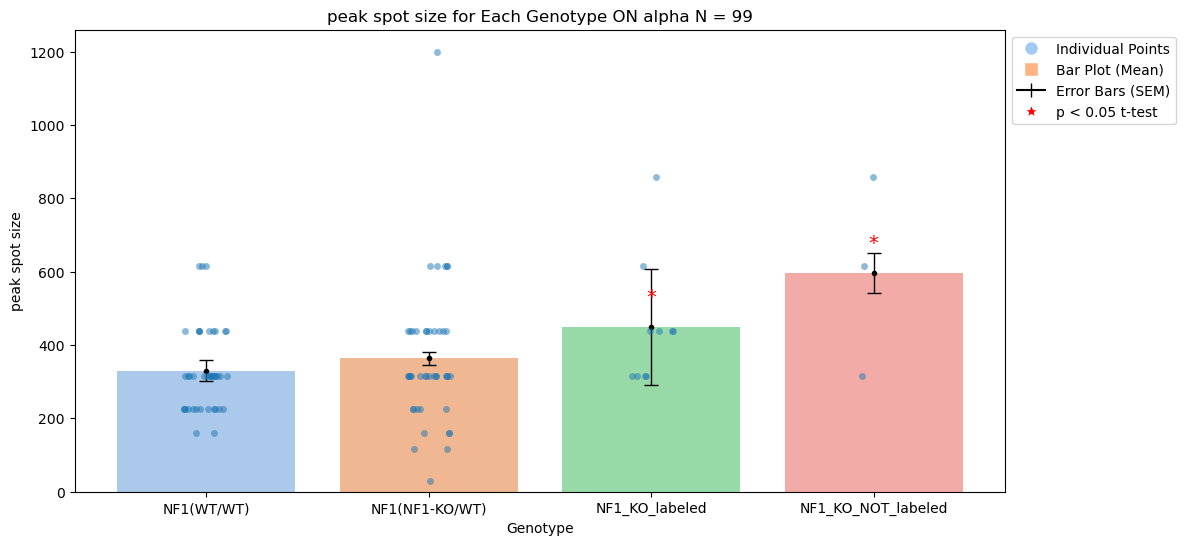

T-test between NF1(WT/WT) and NF1(NF1-KO/WT):
T-statistic: 1.103832884211848
P-value: 0.2741473771371957


T-test between NF1(WT/WT) and NF1_KO_labeled:
T-statistic: 0.8501058096068904
P-value: 0.40104437575972895


T-test between NF1(WT/WT) and NF1_KO_NOT_labeled:
T-statistic: 0.3465004062327038
P-value: 0.731041245369425




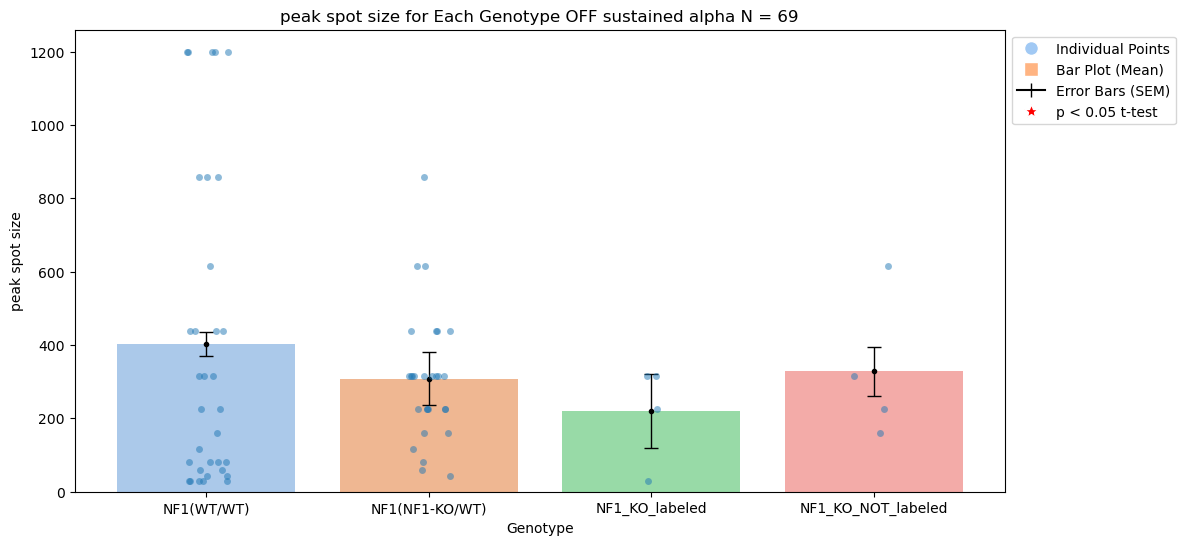

T-test between NF1(WT/WT) and NF1(NF1-KO/WT):
T-statistic: 1.4298273084303363
P-value: 0.15938074045741


T-test between NF1(WT/WT) and NF1_KO_labeled:
T-statistic: -0.13201208807438478
P-value: 0.8960752327813287


T-test between NF1(WT/WT) and NF1_KO_NOT_labeled:
T-statistic: 0.4846667952941716
P-value: 0.6323068303692563




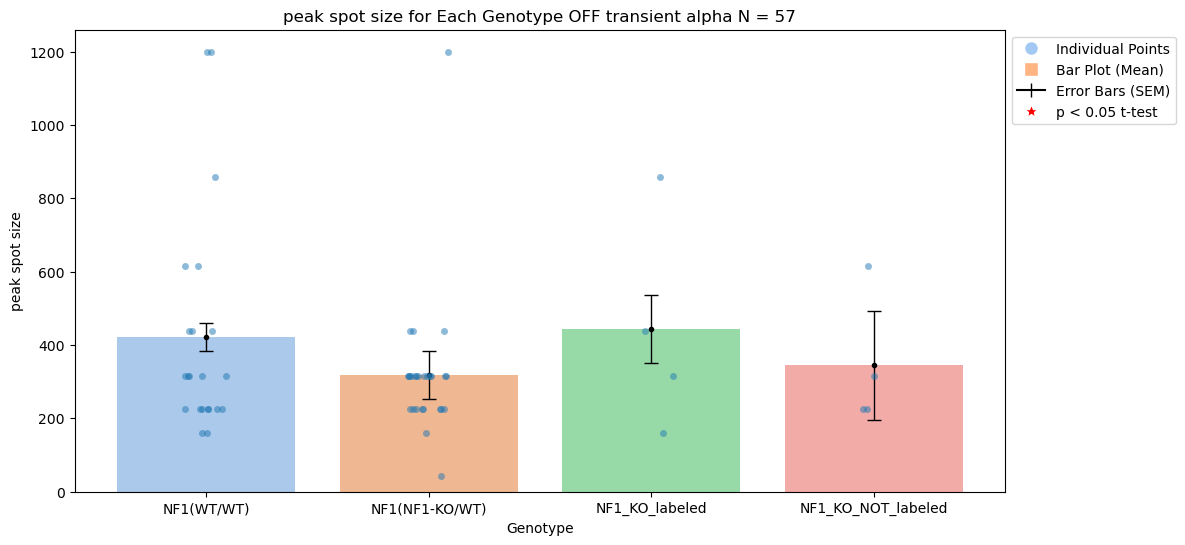

In [13]:
#Plot peak spot size 
show_plots('peak spot size', 'peak_size_OFF', 'peak_size_ON' )

T-test between NF1(WT/WT) and NF1(NF1-KO/WT):
T-statistic: -0.19923139970208972
P-value: 0.8425632088686891


T-test between NF1(WT/WT) and NF1_KO_labeled:
T-statistic: -2.7385293669786486
P-value: 0.008528517768544356


T-test between NF1(WT/WT) and NF1_KO_NOT_labeled:
T-statistic: -0.054267257424598425
P-value: 0.956973588725853




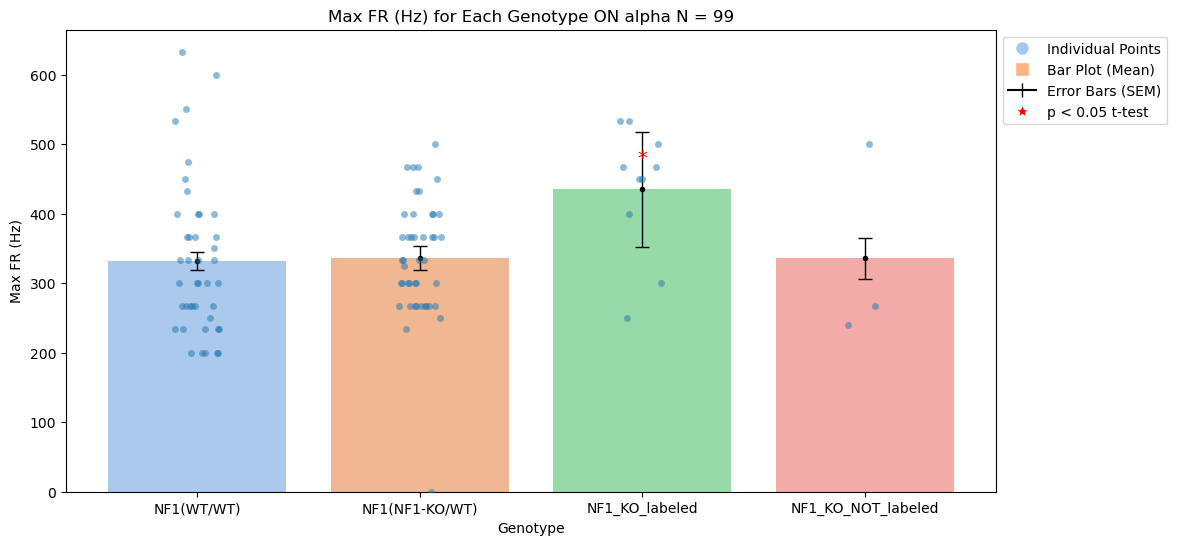

T-test between NF1(WT/WT) and NF1(NF1-KO/WT):
T-statistic: 0.5667831515634415
P-value: 0.5730115285423703


T-test between NF1(WT/WT) and NF1_KO_labeled:
T-statistic: 0.2489872971082894
P-value: 0.8048259657852816


T-test between NF1(WT/WT) and NF1_KO_NOT_labeled:
T-statistic: -1.918312694077525
P-value: 0.06325811916192484




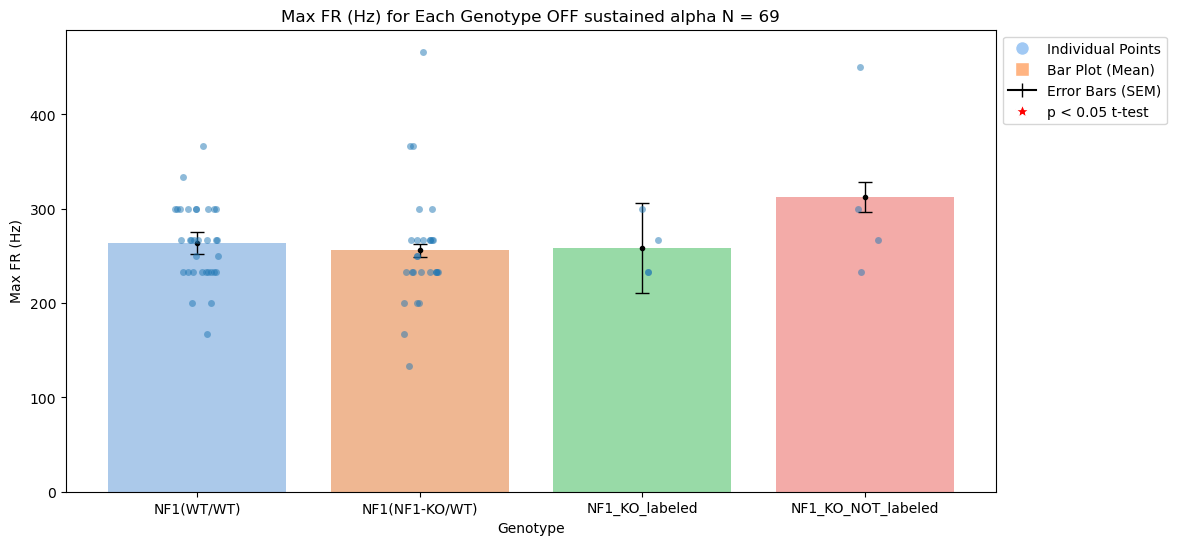

T-test between NF1(WT/WT) and NF1(NF1-KO/WT):
T-statistic: 0.2534330485986627
P-value: 0.8010389190710002


T-test between NF1(WT/WT) and NF1_KO_labeled:
T-statistic: 0.22302104685488677
P-value: 0.8254063826104582


T-test between NF1(WT/WT) and NF1_KO_NOT_labeled:
T-statistic: -1.339421265919166
P-value: 0.19298070758347408




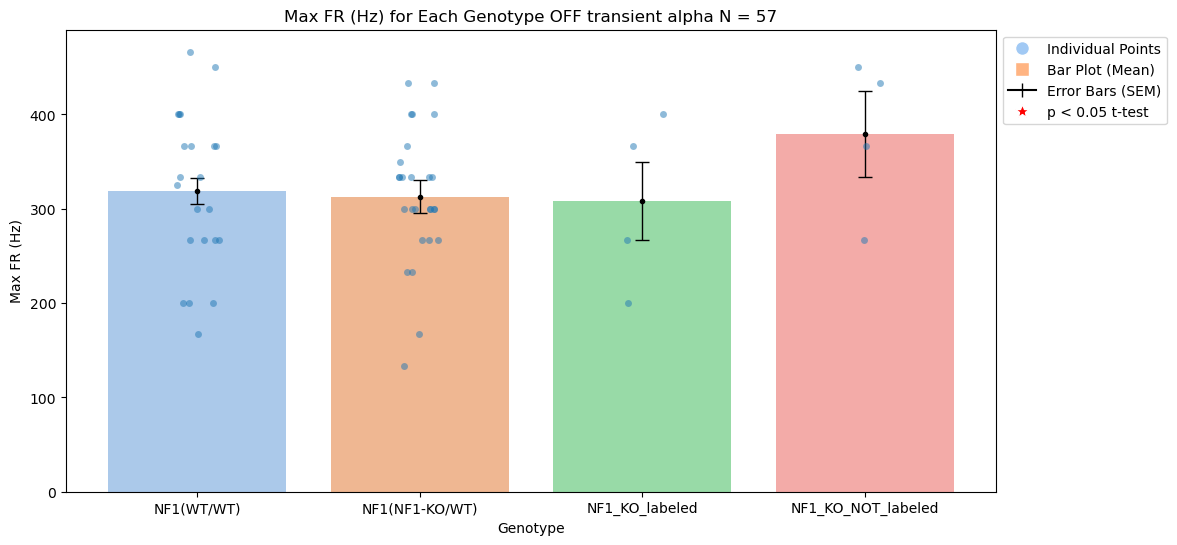

In [14]:
show_plots('Max FR (Hz)', 'peak_FR', 'peak_FR')

T-test between NF1(WT/WT) and NF1(NF1-KO/WT):
T-statistic: 1.5536306934838604
P-value: 0.12403230393321188


T-test between NF1(WT/WT) and NF1_KO_labeled:
T-statistic: 0.3757831197567254
P-value: 0.708667809254847


T-test between NF1(WT/WT) and NF1_KO_NOT_labeled:
T-statistic: 0.4944811425967704
P-value: 0.6234833917215551




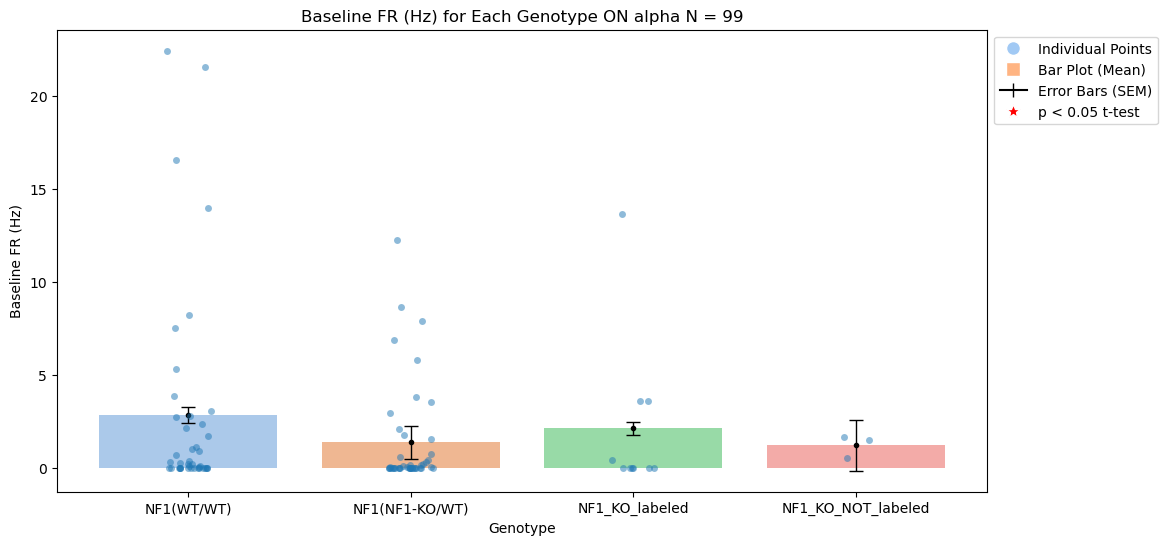

T-test between NF1(WT/WT) and NF1(NF1-KO/WT):
T-statistic: 1.9793560546137445
P-value: 0.05244805045352343


T-test between NF1(WT/WT) and NF1_KO_labeled:
T-statistic: 3.8010412728097474
P-value: 0.0005528328137524813


T-test between NF1(WT/WT) and NF1_KO_NOT_labeled:
T-statistic: 0.9892283340919031
P-value: 0.32934129191633843




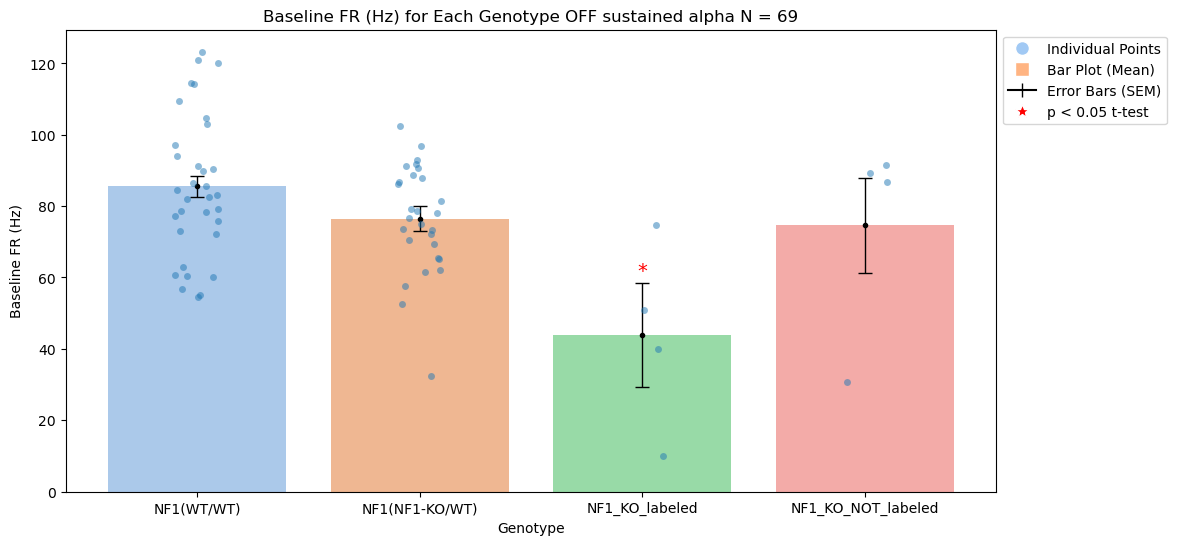

T-test between NF1(WT/WT) and NF1(NF1-KO/WT):
T-statistic: 1.137923052580755
P-value: 0.2609202493510824


T-test between NF1(WT/WT) and NF1_KO_labeled:
T-statistic: 2.9288514772318837
P-value: 0.007344025651423853


T-test between NF1(WT/WT) and NF1_KO_NOT_labeled:
T-statistic: 2.857195786763478
P-value: 0.008689958741726284




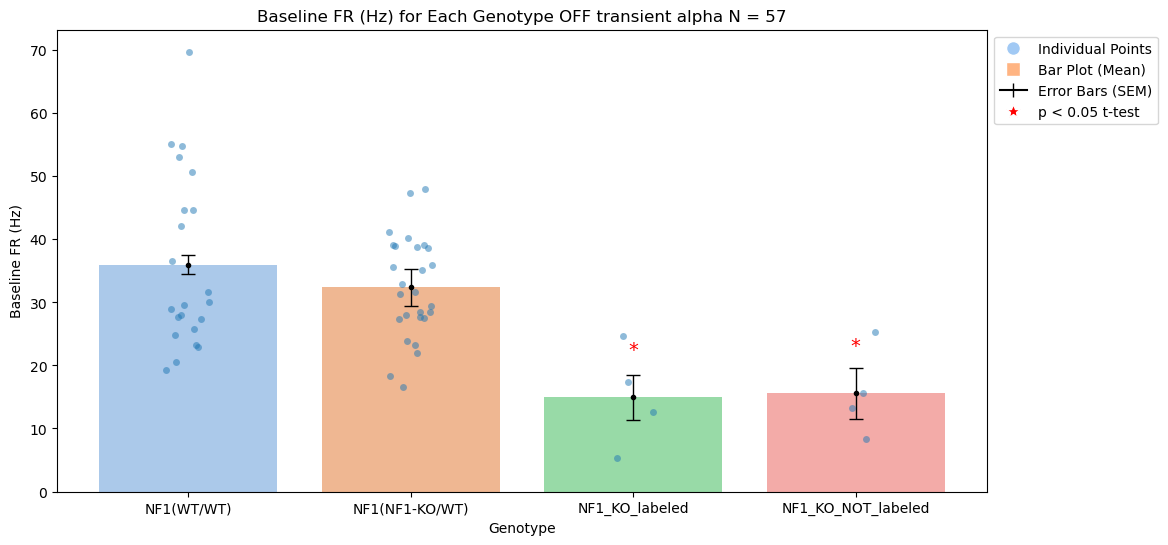

In [15]:
show_plots('Baseline FR (Hz)', 'baseline_FR', 'baseline_FR')